In [2]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np 


c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train=X_train / 255
X_test=X_test /255

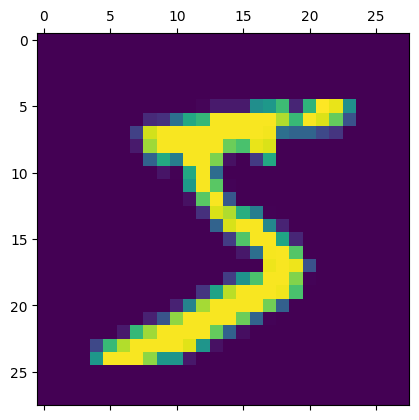

In [9]:
plt.matshow(X_train[0])

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
#changing 2d to 1d
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape


(60000, 784)

In [12]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(X_train_flattened,y_train,epochs=5)

c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8779 - loss: 0.4659
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9151 - loss: 0.3040
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9236 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9259 - loss: 0.2667


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.2653


[0.2653105854988098, 0.9266999959945679]

In [15]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.2692492e-02, 4.3126576e-07, 4.9838994e-02, 9.7034478e-01,
       3.7558242e-03, 1.2361119e-01, 1.6004251e-06, 9.9978632e-01,
       1.0899847e-01, 6.8775749e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

np.int64(7)

In [18]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,   10,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    8,  932,   16,    9,    2,   13,    9,   37,    3],
       [   1,    0,   20,  934,    1,   13,    2,    8,   23,    8],
       [   1,    1,    3,    1,  924,    0,   11,    3,   10,   28],
       [   9,    3,    2,   41,   11,  758,   19,    6,   36,    7],
       [   7,    3,    7,    1,    7,    7,  920,    2,    4,    0],
       [   1,    5,   22,   10,    9,    1,    0,  940,    3,   37],
       [   7,    7,    8,   23,    9,   23,    9,   10,  870,    8],
       [   9,    7,    2,   13,   30,    5,    0,   15,    6,  922]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

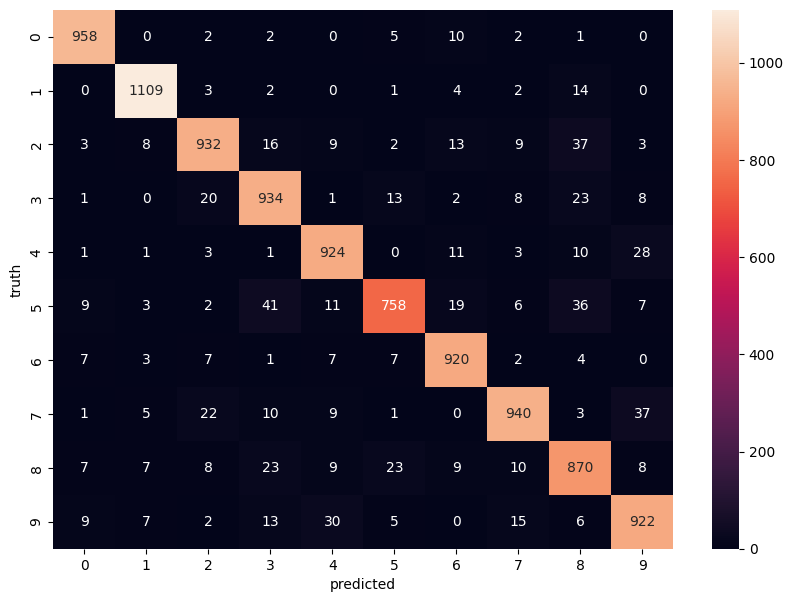

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [25]:
model=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(X_train_flattened,y_train,epochs=5)

c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9444 - loss: 0.1858
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9772 - loss: 0.0745
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9839 - loss: 0.0499
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9891 - loss: 0.0340
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9920 - loss: 0.0249


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.0720


[0.07204407453536987, 0.9789000153541565]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(95.72222222222221, 0.5, 'truth')

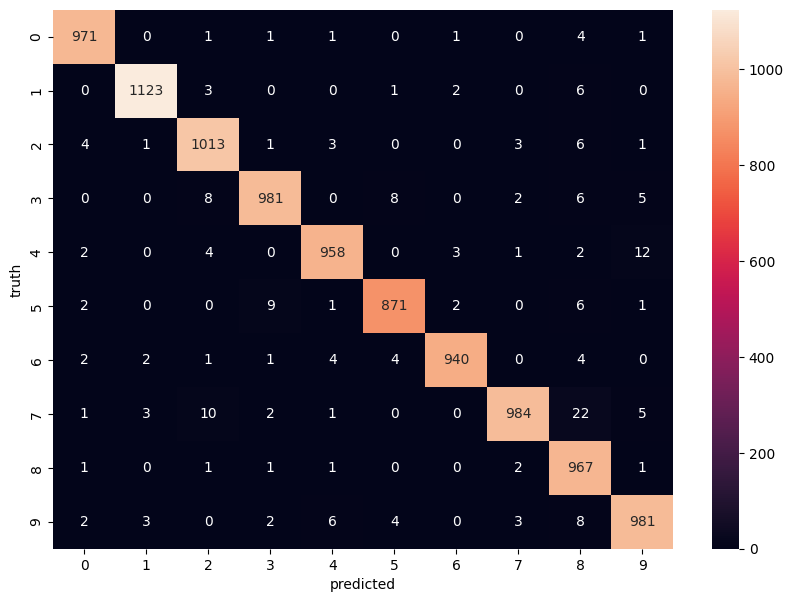

In [27]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")